In [4]:
import re

import matplotlib.pyplot as plt
import numpy as np

import nb_utils

def get_pd_times(log_file, models):
	log = log_file.read_text()
	return [
		float(re.search(model + r'/pds: ([\d\.]+)', log).group(1))
		for model in models
	]

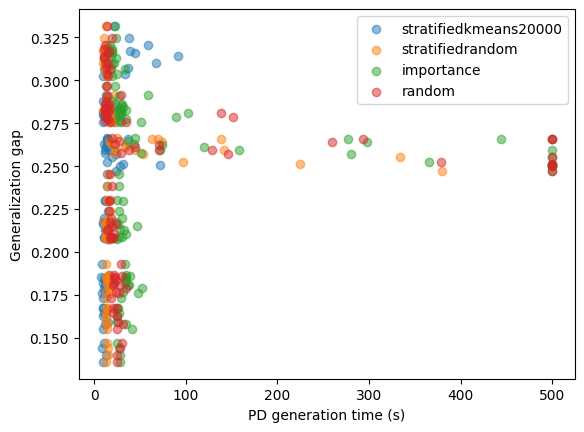

In [34]:
gen_gaps = nb_utils.gen_gaps[1]
models = list(gen_gaps.keys())
gaps = list(gen_gaps.values())
samplers, log_files = zip(*nb_utils.get_files(task=1, pattern='*log.txt'))
times = np.array([get_pd_times(files[0], models) for files in log_files])

plt.title('')
for x in times:
	plt.scatter(x, gaps, alpha=0.5)
plt.legend(samplers)
plt.xlabel('PD generation time (s)')
plt.ylabel('Generalization gap')
plt.show()

In [38]:
import pandas as pd

ix = (times > 200).any(axis=0)
table = pd.DataFrame(
	data=dict(zip(samplers, times[:,ix])),
	index=np.array(models)[ix]
)
table[table >= 500] = 'X'
table


,stratifiedkmeans20000,stratifiedrandom,importance,random
model_28,31.642805,224.34377,X,X
model_29,23.562235,379.908232,X,X
model_30,14.329291,74.045154,297.679627,259.930462
model_31,23.894842,53.225494,280.549644,145.886243
model_92,14.608175,69.250672,444.203789,293.944307
model_93,14.112722,96.808836,365.116832,378.754854
model_156,71.698594,X,X,X
model_157,27.706855,X,X,X
model_158,21.271653,141.63678,X,128.167928
model_159,14.043788,63.265419,276.78135,X


In [39]:
log_files = nb_utils.get_files(task=1, sampler='random', pattern='*log.txt')
times = np.array([get_pd_times(files[0], models) for files in log_files])
ix = (times >= 500).any(axis=0)
table = pd.DataFrame(
	data=dict(zip(range(3), times[:,ix])),
	index=np.array(models)[ix]
)
table[table >= 500] = 'X'
table

,0,1,2
model_28,X,X,X
model_29,X,X,X
model_93,378.754854,491.98472,X
model_156,X,X,X
model_157,X,X,X
model_158,128.167928,392.706989,X
model_159,X,228.238523,452.32803
model_220,X,X,X
model_221,X,X,X
